In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
df = pd.read_csv("bank_loan_dataset.csv")
df.head()


,customer_id,age,gender,income,employment_years,credit_score,loan_amount,loan_term_months,interest_rate,loan_purpose,existing_debt,debt_to_income,approval_status,default_status,application_date,region,branch
0,1,32,Female,118354,12,338,49590,24,7.52,Education,9184,0.08,Rejected,No,2/21/2024,East,Branch A
1,2,29,Male,149730,16,428,24171,48,13.47,Education,17026,0.11,Rejected,No,4/12/2023,South,Branch B
2,3,60,Male,126421,12,344,22633,24,12.91,Education,1713,0.01,Rejected,No,1/25/2022,South,Branch C
3,4,51,Female,100616,15,484,21548,36,16.63,Car,16319,0.16,Rejected,No,2/18/2024,East,Branch B
4,5,46,Female,111627,1,809,44530,60,13.47,Personal,16519,0.15,Approved,No,10/27/2023,West,Branch A


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       500 non-null    int64  
 1   age               500 non-null    int64  
 2   gender            500 non-null    object 
 3   income            500 non-null    int64  
 4   employment_years  500 non-null    int64  
 5   credit_score      500 non-null    int64  
 6   loan_amount       500 non-null    int64  
 7   loan_term_months  500 non-null    int64  
 8   interest_rate     500 non-null    float64
 9   loan_purpose      500 non-null    object 
 10  existing_debt     500 non-null    int64  
 11  debt_to_income    500 non-null    float64
 12  approval_status   500 non-null    object 
 13  default_status    500 non-null    object 
 14  application_date  500 non-null    object 
 15  region            500 non-null    object 
 16  branch            500 non-null    object 
dt

In [21]:
df.describe()


,customer_id,age,income,employment_years,credit_score,loan_amount,loan_term_months,interest_rate,existing_debt,debt_to_income
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,39.448000,89725.362000,10.198000,579.858000,27928.358000,36.960000,11.695160,9943.148000,0.132660
std,144.481833,11.628144,33914.781785,5.823971,155.048799,13022.922768,16.789347,3.814052,5725.801593,0.107615
min,1.000000,21.000000,30128.000000,1.000000,300.000000,5156.000000,12.000000,5.050000,53.000000,0.000000
25%,125.750000,29.000000,61559.000000,5.000000,451.000000,16608.000000,24.000000,8.380000,4877.000000,0.060000
50%,250.500000,39.000000,89565.500000,10.000000,580.500000,28468.500000,36.000000,11.680000,9976.500000,0.110000
75%,375.250000,49.000000,116954.000000,15.000000,711.000000,39001.500000,48.000000,15.235000,14975.000000,0.170000
max,500.000000,60.000000,149730.000000,20.000000,847.000000,49963.000000,60.000000,17.980000,19962.000000,0.650000


In [22]:
df['approval_status'].value_counts()


approval_status
Approved    271
Rejected    229
Name: count, dtype: int64

In [23]:
df.groupby('approval_status')['income'].mean()


approval_status
Approved    88657.612546
Rejected    90988.943231
Name: income, dtype: float64

In [24]:
df['default_status'].value_counts(normalize=True) * 100


default_status
No     91.6
Yes     8.4
Name: proportion, dtype: float64

In [28]:
df['risk_flag'] = np.where(df['debt_to_income'] > 0.4, 'High Risk', 'Low Risk')


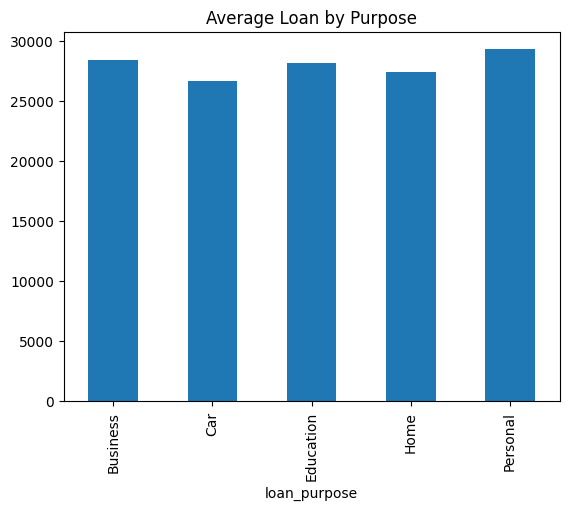

In [29]:
df.groupby('loan_purpose')['loan_amount'].mean().plot(kind='bar')
plt.title("Average Loan by Purpose")
plt.show()


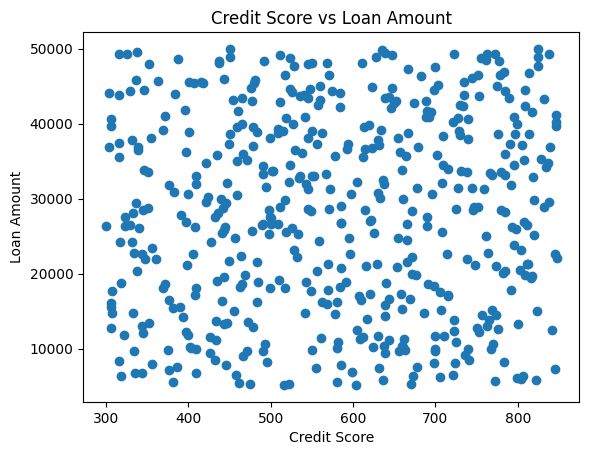

In [30]:
plt.scatter(df['credit_score'], df['loan_amount'])
plt.title("Credit Score vs Loan Amount")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()


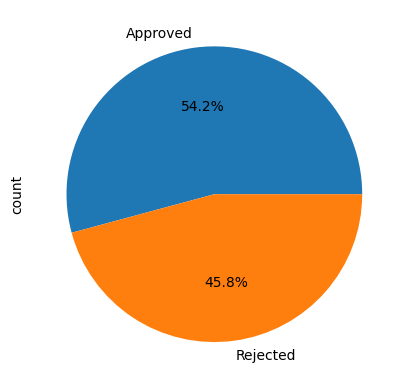

In [31]:
df['approval_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()
